### Linear Regression Modeling Lab

This lab will walk you through the basics of building a linear regression model out of a training and test set using a variety of techniques, including:

 - estimating distributional fit
 - onehot and target encoding
 - measuring progress with cross validation scores
 - creating a custom loss function
 - properly using inferences from the training set to transform the test set
 
**Some of these columns might have missing values.  Decide on the best approach for filling them in based on what we did from last class.**

#### Step 1).  Upload the training and test set from the `\movies` folder inside the `\Data` folder

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import probplot

In [10]:
train = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit3/Data/movies/train 2.csv', parse_dates=['release_date'])
test  = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit3/Data/movies/test.csv', parse_dates=['release_date'])

In [11]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [6]:
train.head()

,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue
0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0
1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0
2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0
3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0
4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0


#### Step 2).  Using a Custom Loss Function

To avoid some of the pitfalls of using a loss function that measures squared error, we're going to modify it a little bit.  This is also a useful skill in practice because lots of projects will require something precise that's not available out-of-the-box in a library.

`Scitkit-Learn` allows for custom loss functions relatively easily

We're going to instead use the **mean squared log error**.  It has the following form:

$$ \frac{\sum{log_{e}(y - \bar{y})^2}}{n} $$

The easiest way to do this is the following:

 - take the log of y using `np.log1p` to avoid the hassles of dealing with negative values
 - fit your model to that, and then calculate the resulting mean squared error
 
So your job is two fold:
 - log transform the target variable (revenue)
 - create a function called `mean_squared_log_error` according to the specifications defined here:  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html, under the heading for the `scoring` argument
 - to test that you did this correctly, run a 10-fold univariate linear regression on the training set using the `popularity` column as `X` and `revenue` as y.  The correct value should be 60.7.

In [13]:
#log transformation: 
train['revenue'] = np.log1p(train['revenue'])

In [15]:
#create a function: Mean Squared Log Error
#cannot take the log of a negative number 
# takes 3 arguments
def mean_squared_log_error(model, X, y):
    error = model.predict(X) - y
    mse = np.mean(error**2)
    return mse

In [16]:
lreg = LinearRegression()

In [17]:
X = train[['popularity']]
y = train['revenue']

In [19]:
scores = cross_val_score(estimator=lreg, X=X, y=y, scoring=mean_squared_log_error, cv=10)

In [20]:
scores

array([62.62649998, 71.38243578, 70.84036913, 65.65364884, 64.9774155 ,
       59.57212907, 55.58544199, 52.88254619, 51.54740026, 52.23485259])

In [21]:
scores.mean()

60.73027393164422

#### Step 3).  Distributional Inference of Your Continuous Variables

This dataset is far from normal.  Use the `probplot()` method to find the *least* normal variable among your numeric variables, judging by the r-squared value of the resulting line.  

Then, see if log-transforming improves its behavior at all.  Use a comparison between your validation scores in a univariate regression between the treated and untreated versions of the variable as your indicator of whether or not this made anything better.

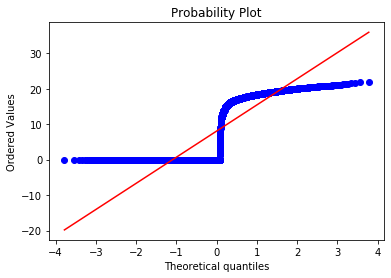

In [22]:
# This only looks at revenue
vals, model = probplot(train['revenue'], plot=plt)

In [23]:
# Creating colms with only numerical value, minus the revenue
num_cols = num_cols = train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('revenue')

In [26]:
#r squared value: ask how this one came about. Nested loop. Can also make the plots individually. 
rsq = [probplot(train[num_cols[i]])[1][2] for i in range(len(num_cols))]

In [27]:
rsq

[0.7759321140913117,
 0.7484030236487506,
 0.7979080090154935,
 0.5965756297041135,
 0.9934328572787294,
 0.9368789697671646,
 0.7803944624567354]

In [35]:
min = rsq.index(min(rsq))

In [38]:
num_cols[min]
#this is the least normal variable in the data set

'vote_count'

In [40]:
vc_score1 = cross_val_score(estimator=lreg, X=train[['vote_count']], y=y, scoring=mean_squared_log_error, cv=10)

In [47]:
vc_score1.mean()

65.94013966051395

In [44]:
vc_score2 = cross_val_score(estimator=lreg, X=np.log1p(train[['vote_count']]), y=y, scoring=mean_squared_log_error, cv=100)

In [46]:
vc_score2.mean() # you want smaller number for the error, r2 want the higher number (close to 1)

43.93631105103633

#### Step 4).  Encoding the `Director` Column

The `Director` column is a good example of some of the challenges of dealing with categorical data.  If George Lucas or Steven Spielberg direct a film, there's a good chance that has a non-random impact on a film's bottom line.  However, there are a lot of unique values, most of which are probably non-impactful.  

Creating a column for everyone is probably not a good idea, but there's also no clear 'order' you could assign them just by looking at their labels.  

In this step you're going to try two different techniques to see which one works better on your dataset.

**Technique 1:**  Only include directors that have a value count of at least 10 *in your training set*, and set everything else to other.  

So:

 - transform the column accordingly (you can make a new column if that's easier)
 - transform the same column in your test set so that if a director's name *doesn't* appear in your new training column it gets set to `Other`

In [57]:
#Transform director colms
train.director.value_counts()

Woody Allen                                   42
Clint Eastwood                                32
Steven Spielberg                              28
Martin Scorsese                               27
Joel Schumacher                               21
Brian De Palma                                20
Ridley Scott                                  20
Ron Howard                                    20
Steven Soderbergh                             20
Wes Craven                                    19
Tim Burton                                    18
Mike Nichols                                  18
John Carpenter                                18
Barry Levinson                                17
Norman Jewison                                17
Sidney Lumet                                  17
David Cronenberg                              17
Francis Ford Coppola                          17
Oliver Stone                                  17
Robert Zemeckis                               16
Richard Donner      

In [59]:
cts_director= train.groupby('director')['director'].transform('count')
#Makes a new colm with the director in the training set

In [63]:
cts_director.head()

0    12.0
1     8.0
2     7.0
3    12.0
4     1.0
Name: director, dtype: float64

In [66]:
train['top_director'] = np.where(cts_director > 10, train['director'], 'Other')
#(where director is greater than 10 it is equal to itself otherwise the value is other)

**Technique 2:** Use target encoding to transform the column instead, and use the results from your training set to transform your test set.  There are a lot of directors in your test set that are not in your training set, and this will result in missing values.  Fill these in with the column average.

**Bonus:** The method we're using here is a little blunt because our average value doesn't account for how often a particular value occurs.  A more nuanced approach to is to take some sort of weighted share between the overall column average and average of your particular unique value.  A good article on this is here:  https://maxhalford.github.io/blog/target-encoding-done-the-right-way/

In [ ]:
# your code here

Use 10-fold univariate regression on both to see which one gives you a better result.

In [ ]:
# your code here

#### Step 5).  Standardize Your Data using the `StandardScaler` module

 - make sure to `fit` it on the training set and `transform` it on the test set

In [ ]:
# your code here

#### Step 6).  To get an estimate of your models performance, use 10-fold cross validation on your training set

In [ ]:
# your code here

#### Step 7).  Now, before making your final predictions for your test sit, fit the model on all of your training data

In [ ]:
# your code here

#### Step 8).  Make a prediction on your test set, and save the results as a dataframe, using two columns:

 - **id**:  the id of your test set rows
 - **prediction**: your corresponding predictions
 
Submit this to a csv file, using the option `index=False`

In [ ]:
# your code here